Michael Fouts and Vishal Tuli  
CHE 625  
February 22nd, 2023

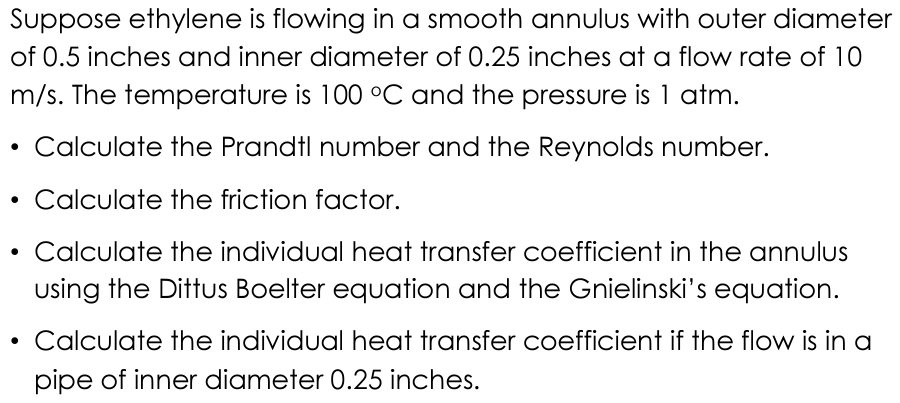

In [4]:
# Import relevant libraries
import math

In [5]:
# Define constants given
do = 0.5 # inches
di = 0.25 # inches
v = 10 # m/s
temp = 100 # °C
press = 1 # atm

# Look up additional values from https://webbook.nist.gov/chemistry/fluid/
density = 0.057355 #lbm/ft3
mu = 8.5805 * 10**-6 #lbm/ft s
Cp = 0.42977 # BTU/lbm*R
k = 0.031895*0.5781759824/3600 # BTU/s ft °F

# I'm using imperical units, so converting from SI units
v = v*3.28084 # ft/s

# Also, converting inches to ft
do = do/12
di = di/12

## 1: Calculate Prandtl Number and Reynolds Number

$$
Pr = \frac{\mu C_p}{k}
$$

$$
Re = \frac{D u \rho}{\mu}
$$

In [6]:
# Prandtl Number
Pr = mu*Cp/k
print('The Prandtl Number for this scenario is:', round(Pr,3))

The Prandtl Number for this scenario is: 0.72


In [7]:
# Reynolds Number
Re = ((do+di)/2)*v*density/mu
print('The Reynolds Number for this scenario is:', round(Re,0))

The Reynolds Number for this scenario is: 6853.0


# 2: Calculate the Friction Factor

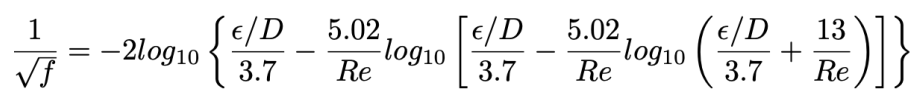

In [8]:
# A lot of this is similar information.  Eta will be 0 but I'll
# Some precomputed constants
eta = 0
D = (di + do) / 2

part1 = (5.02/Re)*math.log10(((eta/D)/3.7) + (13/Re))
part2 = (5.02/Re)*math.log10(((eta/D)/3.7) - part1)
part3 = -2*(math.log10(((eta/D)/3.7) - part2))
f = part3**-2

print('The friction factor using the Zigrang-Sylvester equation is:', round(f,4))


The friction factor using the Zigrang-Sylvester equation is: 0.0342


# 3: Calculate the heat transfer coefficient in the annulus using the:

## a) Dittus Boelter Equation

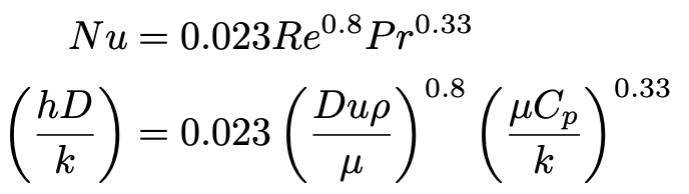

In [9]:
Nu = 0.023*(Re**0.8)*(Pr**0.33)
h = Nu*k/D

print('The heat transfer coefficient using the Dittus Boelter Equation is:', round(h,5), 'BTU/s ft2 °F')
print('The heat transfer coefficient using the Dittus Boelter Equation is:', round(h*3600,2), 'BTU/h ft2 °F')

The heat transfer coefficient using the Dittus Boelter Equation is: 0.00396 BTU/s ft2 °F
The heat transfer coefficient using the Dittus Boelter Equation is: 14.27 BTU/h ft2 °F


## b) Gnielinki's Equation
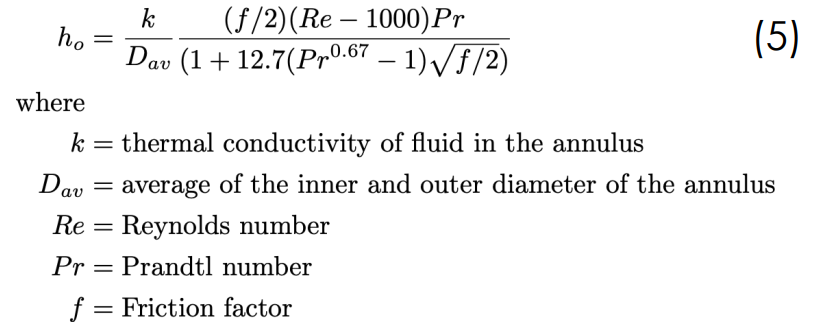

In [10]:
h = (k/D)*((f/2)*(Re-1000)*Pr)/(1+12.7*((Pr**0.67)-1)*(f/2)**0.5)
print('The heat transfer coefficient using the Gnielinki Equation is:', round(h,5), 'BTU/s ft2 °F')
print('The heat transfer coefficient using the Gnielinki Equation is:', round(h*3600,2), 'BTU/h ft2 °F')

The heat transfer coefficient using the Gnielinki Equation is: 0.01758 BTU/s ft2 °F
The heat transfer coefficient using the Gnielinki Equation is: 63.29 BTU/h ft2 °F


# 4: Calculate the heat transfer coefficient if it is a pipe ID of 0.25 inches instead of the annulus described

Since I used code, this is the same code as above, copy and pasted and changing values for the diameter at the very begining.

In [11]:
# Define constants given
D = 0.25/12 #ft
v = 10 # m/s
temp = 100 # °C
press = 1 # atm

# Look up additional values from https://webbook.nist.gov/chemistry/fluid/
density = 0.057355 #lbm/ft3
mu = 8.5805 * 10**-6 #lbm/ft s
Cp = 0.42977 # BTU/lbm*R
k = 0.031895*0.5781759824/3600 # BTU/s ft °F

# I'm using imperical units, so converting from SI units
v = v*3.28084 # ft/s

# Prandtl Number
Pr = mu*Cp/k
print('The Prandtl Number for this scenario is:', round(Pr,3))

# Reynolds Number
Re = (D)*v*density/mu
print('The Reynolds Number for this scenario is:', round(Re,0))

# A lot of this is similar information.  Eta will be 0 but I'll
import math

# Some precomputed constants
eta = 0

part1 = (5.02/Re)*math.log10(((eta/D)/3.7) + (13/Re))
part2 = (5.02/Re)*math.log10(((eta/D)/3.7) - part1)
part3 = -2*(math.log10(((eta/D)/3.7) - part2))
f = part3**-2

print('The friction factor using the Zigrang-Sylvester equation is:', round(f,4))

Nu = 0.023*(Re**0.8)*(Pr**0.33)
h = Nu*k/D

print('The heat transfer coefficient using the Dittus Boelter Equation is:', round(h,5), 'BTU/s ft2 °F')
print('The heat transfer coefficient using the Dittus Boelter Equation is:', round(h*3600,2), 'BTU/h ft2 °F')

h = (k/D)*((f/2)*(Re-1000)*Pr)/(1+12.7*((Pr**0.67)-1)*(f/2)**0.5)
print('The heat transfer coefficient using the Gnielinki Equation is:', round(h,5), 'BTU/s ft2 °F')
print('The heat transfer coefficient using the Gnielinki Equation is:', round(h*3600,2), 'BTU/h ft2 °F')

The Prandtl Number for this scenario is: 0.72
The Reynolds Number for this scenario is: 4569.0
The friction factor using the Zigrang-Sylvester equation is: 0.0384
The heat transfer coefficient using the Dittus Boelter Equation is: 0.0043 BTU/s ft2 °F
The heat transfer coefficient using the Dittus Boelter Equation is: 15.47 BTU/h ft2 °F
The heat transfer coefficient using the Gnielinki Equation is: 0.01859 BTU/s ft2 °F
The heat transfer coefficient using the Gnielinki Equation is: 66.92 BTU/h ft2 °F
